In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER
import os,errno
import sys
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import pandas as pd
import datetime as dt
from scipy.ndimage.measurements import label
import scipy.stats as st
from math import sin, cos, sqrt, atan2, radians
import geopy.distance
%matplotlib inline

dir2='/thorncroftlab_rit/ahenny/rain/'
dir1a='/thorncroftlab_rit/ahenny/rain/tccip_daily/'
dir1='/thorncroftlab_rit/ahenny/rain/US/ghcnd_all/'
dir='/thorncroftlab_rit/ahenny/rain/DISSERTATION_SCRIPTS_RESULTS/'
#This script analyzes means and trends of moisture flux, wind, and specific humidity though chosen cross-section

In [ ]:
try:
    ds.close()
except:
    pass
ds=xr.open_dataset(dir+'taiwan_ivt_xc_perp.nc')
ivt=ds.ivt_cross
print(ivt.sel(time=dt.datetime(2005,6,15,6)))
print(ivt.max().values)

In [ ]:
#@author: Michael Schramm on GitHub
#This function is derived from code originally posted by Sat Kumar Tomer
#(satkumartomer@gmail.com)
#See also: http://vsp.pnnl.gov/help/Vsample/Design_Trend_Mann_Kendall.htm
from scipy.stats import norm
import scipy.stats as st
def mk_test(x, alpha=0.05):
    n = len(x)

    # calculate S
    s = 0
    for k in range(n-1):
        for j in range(k+1, n):
            s += np.sign(x[j] - x[k])

    # calculate the unique data
    unique_x, tp = np.unique(x, return_counts=True)
    g = len(unique_x)

    # calculate the var(s)
    if n == g:  # there is no tie
        var_s = (n*(n-1)*(2*n+5))/18
    else:  # there are some ties in data
        var_s = (n*(n-1)*(2*n+5) - np.sum(tp*(tp-1)*(2*tp+5)))/18

    if s > 0:
        z = (s - 1)/np.sqrt(var_s)
    elif s < 0:
        z = (s + 1)/np.sqrt(var_s)
    else: # s == 0:
        z = 0

    # calculate the p_value
    p = 2*(1-norm.cdf(abs(z)))  # two tail test
    h = abs(z) > norm.ppf(1-alpha/2)

    if (z < 0) and h:
        trend = 'decreasing'
    elif (z > 0) and h:
        trend = 'increasing'
    else:
        trend = 'no trend'

    return trend, h, p, z

In [ ]:
l=10
dc=xr.open_dataset(dir+'taiwan_mflux_cross_section_perp_'+str(l)+'.nc')
mflux_perp=dc['mflux_perp']
mflux_all_mean=mflux_perp.mean(dim='time',skipna=True)

yrs_taiwan=np.arange(1979,2020,1)
mflux_annual=xr.zeros_like(mflux_perp[0:41,:,:])
for i in range(41):
    year=1979+i
    date_start=dt.datetime(year,5,14,18)
    
    date_range=[date_start+dt.timedelta(hours=6*x) for x in range(47*4)]
    if 1==1:
        if year==2005:
            elim=[dt.datetime(2005,6,11,18)+dt.timedelta(hours=6*x) for x in range(4*4)]
            date_range=[x for x in date_range if x not in elim]
        if year==2006:
            elim=[dt.datetime(2006,6,7,18)+dt.timedelta(hours=6*x) for x in range(3*4)]
            date_range=[x for x in date_range if x not in elim]
        if year==2012:
            elim=[dt.datetime(2012,6,9,18)+dt.timedelta(hours=6*x) for x in range(3*4)]
            date_range=[x for x in date_range if x not in elim]
        if year==2017:
            elim=[dt.datetime(2017,6,1,18)+dt.timedelta(hours=6*x) for x in range(2*4)]
            date_range=[x for x in date_range if x not in elim]
    print(len(date_range))

    mflux_year=mflux_perp.sel(time=date_range)
    mflux_mean=mflux_year.mean(dim='time',skipna=True)
    mflux_annual[i,:,:]=mflux_mean.values
    
mflux_avg=mflux_annual.mean(dim='time',skipna=True)

mflux_annual=xr.zeros_like(mflux_perp[0:41,:,:])
for i in range(41):
    year=1979+i
    date_start=dt.datetime(year,5,14,18)
    
    date_range=[date_start+dt.timedelta(hours=6*x) for x in range(47*4)]
    if 1==1:
        if year==2005:
            elim=[dt.datetime(2005,6,11,18)+dt.timedelta(hours=6*x) for x in range(4*4)]
            date_range=[x for x in date_range if x not in elim]

            mflux_year=mflux_perp.sel(time=date_range)
            for j in range(len(elim)):
                mflux_avg_copy=mflux_avg.copy()
                mflux_avg_copy.expand_dims('time',0)
                mflux_avg_copy['time']=elim[j]
                mflux_year=xr.concat([mflux_year,mflux_avg_copy],dim='time')

        if year==2006:
            elim=[dt.datetime(2006,6,7,18)+dt.timedelta(hours=6*x) for x in range(3*4)]
            date_range=[x for x in date_range if x not in elim]

            mflux_year=mflux_perp.sel(time=date_range)
            for j in range(len(elim)):
                mflux_avg_copy=mflux_avg.copy()
                mflux_avg_copy.expand_dims('time',0)
                mflux_avg_copy['time']=elim[j]
                mflux_year=xr.concat([mflux_year,mflux_avg_copy],dim='time')

        if year==2012:
            elim=[dt.datetime(2012,6,9,18)+dt.timedelta(hours=6*x) for x in range(3*4)]
            date_range=[x for x in date_range if x not in elim]

            mflux_year=mflux_perp.sel(time=date_range)
            for j in range(len(elim)):
                mflux_avg_copy=mflux_avg.copy()
                mflux_avg_copy.expand_dims('time',0)
                mflux_avg_copy['time']=elim[j]
                mflux_year=xr.concat([mflux_year,mflux_avg_copy],dim='time')

        if year==2017:
            elim=[dt.datetime(2017,6,1,18)+dt.timedelta(hours=6*x) for x in range(2*4)]
            date_range=[x for x in date_range if x not in elim]

            mflux_year=mflux_perp.sel(time=date_range)
            for j in range(len(elim)):
                mflux_avg_copy=mflux_avg.copy()
                mflux_avg_copy.expand_dims('time',0)
                mflux_avg_copy['time']=elim[j]
                mflux_year=xr.concat([mflux_year,mflux_avg_copy],dim='time')

    else:
        mflux_year=mflux_perp.sel(time=date_range)
    #print(len(date_range))

    mflux_mean=mflux_year.mean(dim='time',skipna=True)
    mflux_annual[i,:,:]=mflux_mean.values

slopes_array=xr.zeros_like(mflux_perp[0,:,:])
sigs_array=xr.zeros_like(mflux_perp[0,:,:])
for i in range(mflux_annual.level.size):
    print(i)
    for j in range(mflux_annual.transect.size):
        time_series=mflux_annual[:,i,j].values.tolist()
        nonzero=[x for x in time_series if x>0]
        if len(nonzero)>0:
            mk_result=mk_test(time_series,alpha=0.05)[0]
            slope=st.linregress(yrs_taiwan,time_series)[0]
            slopes_array[i,j]=slope
            if mk_result=='increasing':
                sigs_array[i,j]=1
            if mk_result=='decreasing':
                sigs_array[i,j]=-1
        else:
            slopes_array[i,j]=np.nan
            sigs_array[i,j]=np.nan


100


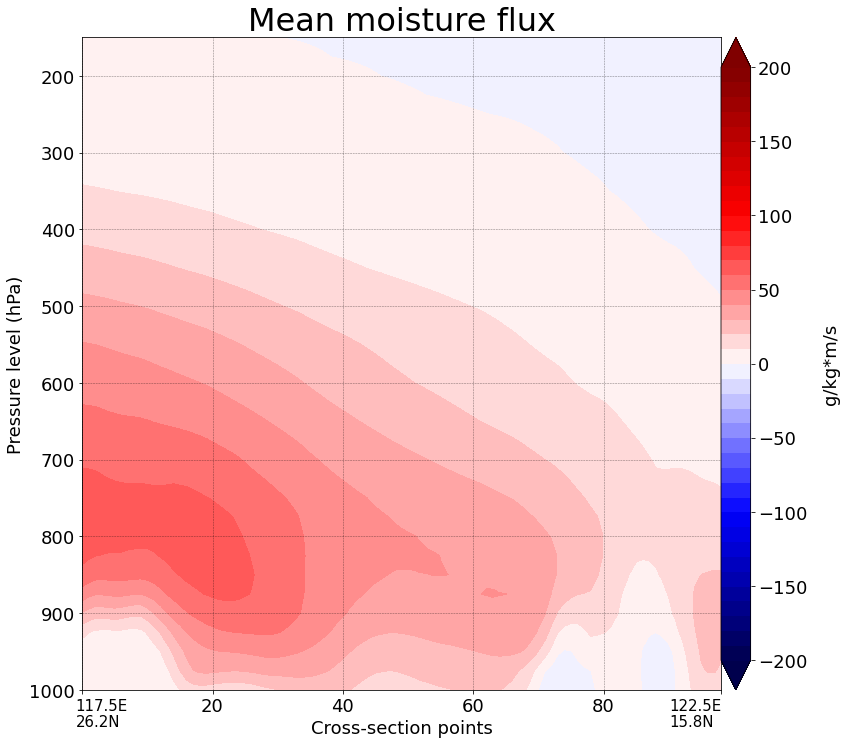

In [176]:
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1)

p_daily=p_daily_means.values.tolist()

dr1=xr.open_dataset(dir+'taiwan_mflux_cross_section_'+str(l)+'.nc')
lats_gc=dr1.lats.values.tolist()
lons_gc=dr1.lons.values.tolist()
print(len(lats_gc))

lat_north=round(lats_gc[0],2)
lat_south=round(lats_gc[-1],2)
lon_north=round(lons_gc[0],2)
lon_south=round(lons_gc[-1],2)

cax=ax.contourf(slopes_array.transect,slopes_array.level,mflux_all_mean*1000.,extend='both',levels=np.arange(-200,210,10),cmap=plt.cm.seismic)
cbar=plt.colorbar(cax,pad=0,fraction=0.046)
plt.gca().invert_yaxis()
ax.tick_params(labelsize=18)
ax.set_title('Mean moisture flux',fontsize=32)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('g/kg*m/s',fontsize=18,labelpad=15)
ax.set_xlabel('Cross-section points',fontsize=18)
ax.set_ylabel('Pressure level (hPa)',fontsize=18)
ax.text(-1,1027,str(lon_north)+'E',fontsize=15)
ax.text(-1,1047,str(lat_north)+'N',fontsize=15)

ax.text(90,1027,str(lon_south)+'E',fontsize=15)
ax.text(90,1047,str(lat_south)+'N',fontsize=15)

plt.xticks([0,20,40,60,80,98])
ax.set_xticklabels(['','20','40','60','80',''])

ax.set_xlim(0,98)
ax.set_ylim(1000,150)

ax.grid(linestyle='--',color='k',linewidth=0.5,alpha=0.5)
plt.show()

100


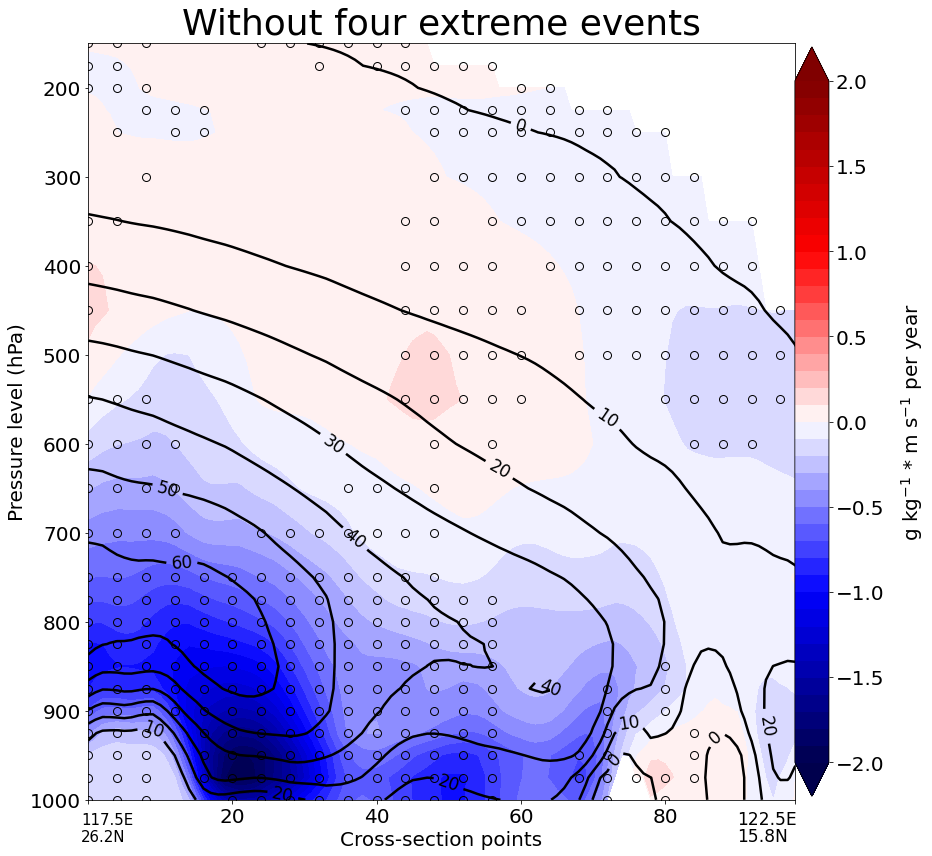

In [24]:
fig=plt.figure(figsize=(13,12))
ax=plt.subplot(1,1,1)

dr1=xr.open_dataset(dir+'taiwan_mflux_cross_section_'+str(l)+'.nc')
lats_gc=dr1.lats.values.tolist()
lons_gc=dr1.lons.values.tolist()
print(len(lats_gc))

lat_north=round(lats_gc[0],2)
lat_south=round(lats_gc[-1],2)
lon_north=round(lons_gc[0],2)
lon_south=round(lons_gc[-1],2)

cax=ax.contourf(slopes_array.transect,slopes_array.level,slopes_array*1000.,extend='both',levels=np.arange(-2,2.1,0.1),cmap=plt.cm.seismic)
cbar=plt.colorbar(cax,pad=0,fraction=0.046)
plt.gca().invert_yaxis()
ax.tick_params(labelsize=20)
ax.set_title('Without four extreme events',fontsize=36,pad=10)
#ax.set_title('Moisture flux',fontsize=36)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('g kg$^{-1}$ * m s$^{-1}$ per year',fontsize=20,labelpad=15)
ax.set_xlabel('Cross-section points',fontsize=20)
ax.set_ylabel('Pressure level (hPa)',fontsize=20)
ax.text(-1,1027,str(lon_north)+'E',fontsize=15)
ax.text(-1,1047,str(lat_north)+'N',fontsize=15)


c=ax.contour(slopes_array.transect,slopes_array.level,mflux_all_mean*1000.,levels=np.arange(-200,210,10),colors='k',linestyles='solid',linewidths=2.5)
plt.clabel(c,fmt='%.00f',fontsize=17)


for i in range(slopes_array.level.size):
    for j in range(slopes_array.transect.size):
         if j%4==0:
            if sigs_array[i,j] in [1,-1]:
                ax.plot(slopes_array.transect[j],slopes_array.level[i],'ko',markerfacecolor='None',markersize=8,mew=1,zorder=20,alpha=1)


ax.text(90,1027,str(lon_south)+'E',fontsize=17)
ax.text(90,1047,str(lat_south)+'N',fontsize=17)

plt.xticks([0,20,40,60,80,98])
ax.set_xticklabels(['','20','40','60','80',''])

ax.set_xlim(0,98)
ax.set_ylim(1000,150)

#ax.grid(linestyle='--',color='k',linewidth=0.5,alpha=0.5)
plt.tight_layout()
plt.show()

In [25]:
fig.savefig(dir+'taiwan_xc_analysis_23.png')

In [ ]:
l=10
dc=xr.open_dataset(dir+'taiwan_mflux_cross_section_perp_wind_'+str(l)+'.nc')
wind_perp=dc['wind_perp']
wind_all_mean=wind_perp.mean(dim='time',skipna=True)

dr1=xr.open_dataset(dir+'taiwan_mflux_cross_section_uvq_'+str(l)+'.nc')
q_perp=dr1.trans_q
q_all_mean=q_perp.mean(dim='time',skipna=True)


yrs_taiwan=np.arange(1979,2020,1)
wind_annual=xr.zeros_like(wind_perp[0:41,:,:])
q_annual=xr.zeros_like(wind_perp[0:41,:,:])
for i in range(41):
    year=1979+i
    date_start=dt.datetime(year,5,14,18)
    date_range=[date_start+dt.timedelta(hours=6*x) for x in range(47*4)]

    wind_year=wind_perp.sel(time=date_range)
    wind_mean=wind_year.mean(dim='time',skipna=True)
    wind_annual[i,:,:]=wind_mean.values
    
    q_year=q_perp.sel(time=date_range)
    q_mean=q_year.mean(dim='time',skipna=True)
    q_annual[i,:,:]=q_mean.values

slopes_array_wind=xr.zeros_like(wind_perp[0,:,:])
sigs_array_wind=xr.zeros_like(wind_perp[0,:,:])
slopes_array_q=xr.zeros_like(wind_perp[0,:,:])
sigs_array_q=xr.zeros_like(wind_perp[0,:,:])
for i in range(wind_annual.level.size):
    print(i)
    for j in range(wind_annual.transect.size):
        time_series_wind=wind_annual[:,i,j].values.tolist()
        nonzero_wind=[x for x in time_series_wind if x>-1000]
        
        time_series_q=q_annual[:,i,j].values.tolist()
        nonzero_q=[x for x in time_series_q if x>-1000]
        if len(nonzero_wind)>0:
            mk_result=mk_test(time_series_wind,alpha=0.05)[0]
            slope=st.linregress(yrs_taiwan,time_series_wind)[0]
            slopes_array_wind[i,j]=slope
            if mk_result=='increasing':
                sigs_array_wind[i,j]=1
            if mk_result=='decreasing':
                sigs_array_wind[i,j]=-1
        else:
            slopes_array_wind[i,j]=np.nan
            sigs_array_wind[i,j]=np.nan
            
        if len(nonzero_q)>0:
            mk_result=mk_test(time_series_q,alpha=0.05)[0]
            slope=st.linregress(yrs_taiwan,time_series_q)[0]
            slopes_array_q[i,j]=slope
            if mk_result=='increasing':
                sigs_array_q[i,j]=1
            if mk_result=='decreasing':
                sigs_array_q[i,j]=-1
        else:
            slopes_array_q[i,j]=np.nan
            sigs_array_q[i,j]=np.nan



In [199]:
print(slopes_array_wind.max().values)
print(wind_all_mean.max().values)

0.078036115
10.298606


100


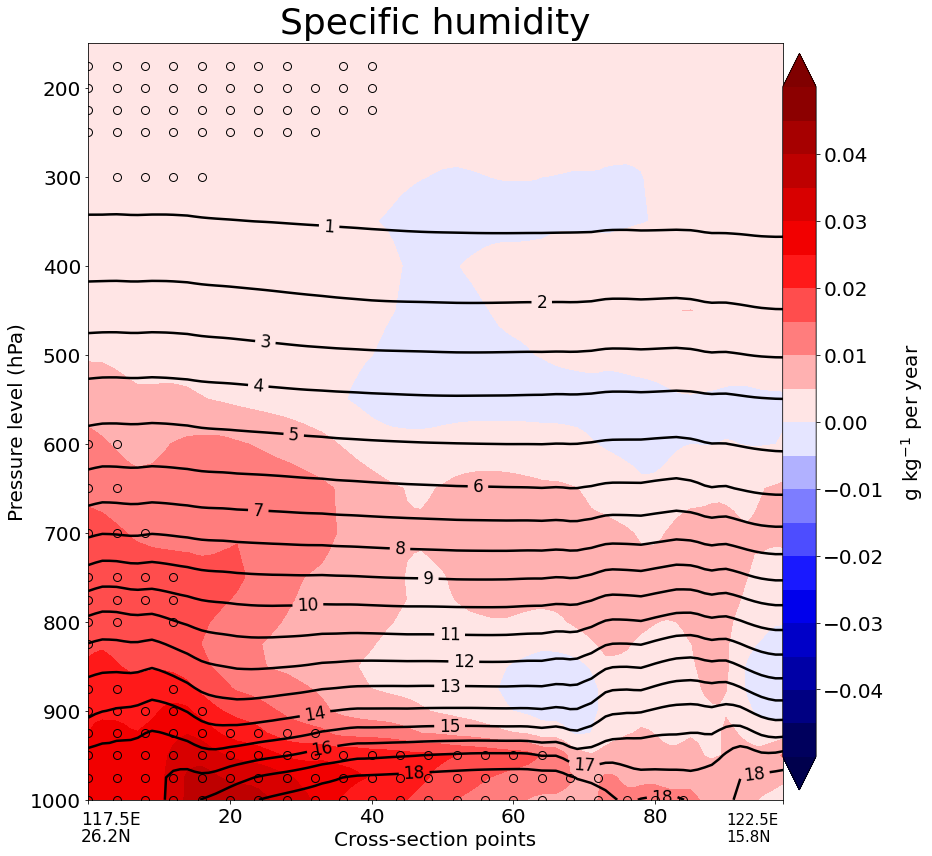

In [16]:
fig=plt.figure(figsize=(13,12))
ax=plt.subplot(1,1,1)

slopes_q_percent=slopes_array_q/q_all_mean*100.

dr1=xr.open_dataset(dir+'taiwan_mflux_cross_section_'+str(l)+'.nc')
lats_gc=dr1.lats.values.tolist()
lons_gc=dr1.lons.values.tolist()
print(len(lats_gc))

lat_north=round(lats_gc[0],2)
lat_south=round(lats_gc[-1],2)
lon_north=round(lons_gc[0],2)
lon_south=round(lons_gc[-1],2)

cax=ax.contourf(slopes_array_q.transect,slopes_array_q.level,slopes_array_q*1000.,extend='both',levels=np.arange(-0.05,0.055,0.005),cmap=plt.cm.seismic)
#cax=ax.contourf(slopes_array_q.transect,slopes_array_q.level,slopes_q_percent,extend='both',levels=np.arange(-0.8,0.85,0.05),cmap=plt.cm.seismic)

cbar=plt.colorbar(cax,pad=0,fraction=0.046,ticks=[-0.04,-0.03,-0.02,-0.01,0,0.01,0.02,0.03,0.04])
plt.gca().invert_yaxis()
ax.tick_params(labelsize=20)
ax.set_title('Specific humidity',fontsize=36,pad=10)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('g kg$^{-1}$ per year',fontsize=20,labelpad=15)
ax.set_xlabel('Cross-section points',fontsize=20)
ax.set_ylabel('Pressure level (hPa)',fontsize=20)
ax.text(-1,1027,str(lon_north)+'E',fontsize=17)
ax.text(-1,1047,str(lat_north)+'N',fontsize=17)


c=ax.contour(slopes_array_q.transect,slopes_array_q.level,q_all_mean*1000.,levels=np.arange(-20,21,1),colors='k',linestyles='solid',linewidths=2.5)
plt.clabel(c,fmt='%.00f',fontsize=17)


for i in range(slopes_array_q.level.size):
    for j in range(slopes_array_q.transect.size):
         if j%4==0:
            if sigs_array_q[i,j] in [1,-1]:
                ax.plot(slopes_array_q.transect[j],slopes_array_q.level[i],'ko',markerfacecolor='None',markersize=8,mew=1,zorder=20,alpha=1)


ax.text(90,1027,str(lon_south)+'E',fontsize=15)
ax.text(90,1047,str(lat_south)+'N',fontsize=15)

plt.xticks([0,20,40,60,80,98])
ax.set_xticklabels(['','20','40','60','80',''])

ax.set_xlim(0,98)
ax.set_ylim(1000,150)

#ax.grid(linestyle='--',color='k',linewidth=0.5,alpha=0.5)
plt.tight_layout()
plt.show()

In [17]:
fig.savefig(dir+'taiwan_xc_analysis_21.png')

100


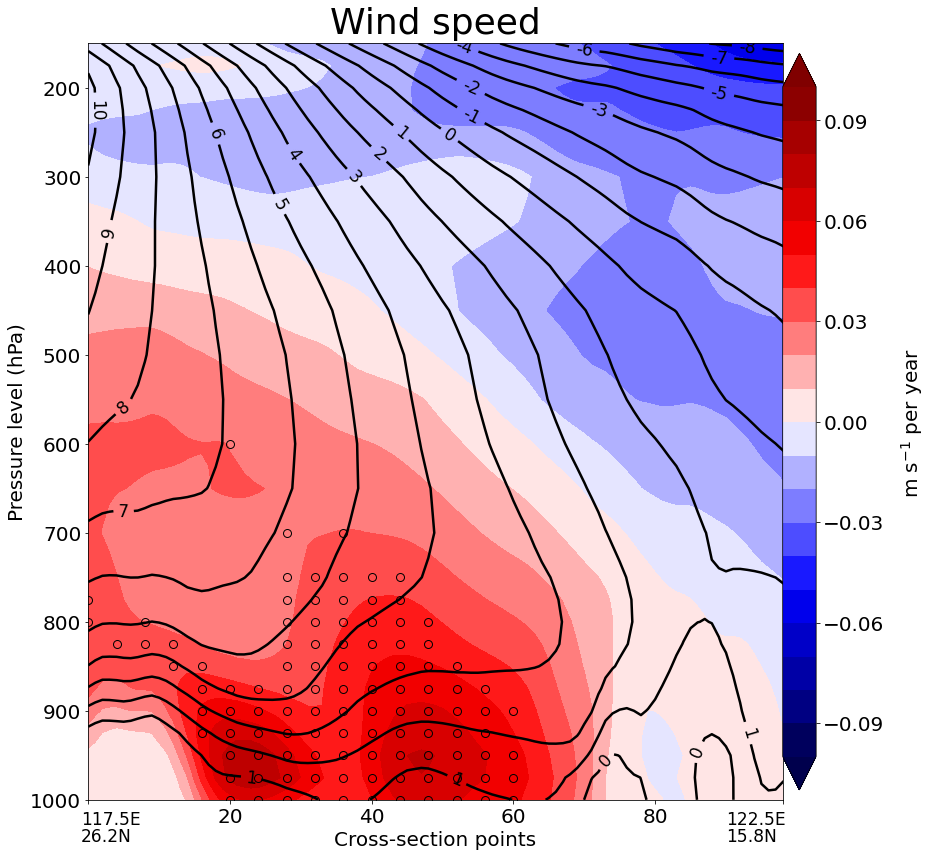

In [18]:
fig=plt.figure(figsize=(13,12))
ax=plt.subplot(1,1,1)

slopes_wind_percent=slopes_array_wind/wind_all_mean*100.

dr1=xr.open_dataset(dir+'taiwan_mflux_cross_section_'+str(l)+'.nc')
lats_gc=dr1.lats.values.tolist()
lons_gc=dr1.lons.values.tolist()
print(len(lats_gc))

lat_north=round(lats_gc[0],2)
lat_south=round(lats_gc[-1],2)
lon_north=round(lons_gc[0],2)
lon_south=round(lons_gc[-1],2)

#cax=ax.contourf(slopes_array_q.transect,slopes_array_q.level,slopes_array_q*1000.,extend='both',levels=np.arange(-0.05,0.055,0.005),cmap=plt.cm.seismic)
cax=ax.contourf(slopes_array_wind.transect,slopes_array_wind.level,slopes_array_wind,extend='both',levels=np.arange(-0.1,0.11,0.01),cmap=plt.cm.seismic)

cbar=plt.colorbar(cax,pad=0,fraction=0.046)
plt.gca().invert_yaxis()
ax.tick_params(labelsize=20)
ax.set_title('Wind speed',fontsize=36,pad=10)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('m s$^{-1}$ per year',fontsize=20,labelpad=15)
ax.set_xlabel('Cross-section points',fontsize=20)
ax.set_ylabel('Pressure level (hPa)',fontsize=20)
ax.text(-1,1027,str(lon_north)+'E',fontsize=17)
ax.text(-1,1047,str(lat_north)+'N',fontsize=17)


c=ax.contour(slopes_array_wind.transect,slopes_array_wind.level,wind_all_mean,levels=np.arange(-20,21,1),colors='k',linestyles='solid',linewidths=2.5)
plt.clabel(c,fmt='%.00f',fontsize=17)


for i in range(slopes_array_wind.level.size):
    for j in range(slopes_array_wind.transect.size):
         if j%4==0:
            if sigs_array_wind[i,j] in [1,-1]:
                ax.plot(slopes_array_wind.transect[j],slopes_array_wind.level[i],'ko',markerfacecolor='None',markersize=8,mew=1,zorder=20,alpha=1)


ax.text(90,1027,str(lon_south)+'E',fontsize=17)
ax.text(90,1047,str(lat_south)+'N',fontsize=17)

plt.xticks([0,20,40,60,80,98])
ax.set_xticklabels(['','20','40','60','80',''])

ax.set_xlim(0,98)
ax.set_ylim(1000,150)

#ax.grid(linestyle='--',color='k',linewidth=0.5,alpha=0.5)
plt.tight_layout()
plt.show()

In [19]:
fig.savefig(dir+'taiwan_xc_analysis_22.png')